# Filip Kucia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import powerlaw

# 1
Draw a histogram with marked sigma intervals for random variables rom the normal distribution.

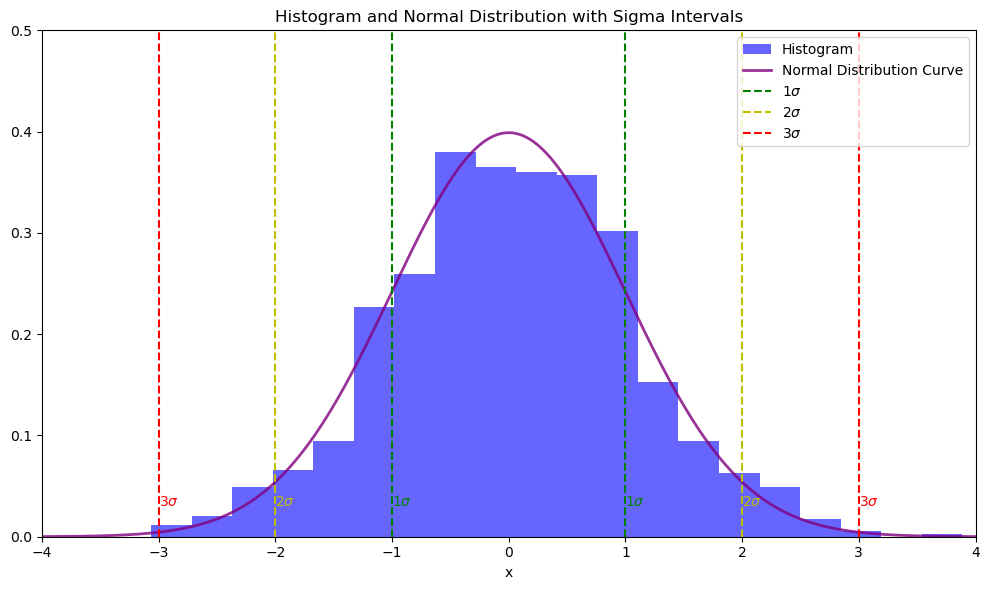

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the normal distribution function
def normal_distribution(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# Generate random variables from the normal distribution
data = np.random.normal(0, 1, 1000)
x = np.linspace(-4, 4, 1000)
# Mark the sigma intervals (mean +/- sigma)
mean = 0
std_dev = 1
sigma_intervals = [mean - std_dev, mean, mean + std_dev]
colors = ['w', 'g', 'y', 'r']

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Histogram')

# Plot the normal distribution curve
ax.plot(x, normal_distribution(x), linewidth=2, color='purple', alpha=0.8, label='Normal Distribution Curve')

# Add vertical lines for sigma intervals and corresponding text
for i in range(1, 4):
    ax.axvline(mean + i * std_dev, color=colors[i], linestyle='--', label=f'{i}$\sigma$')
    ax.axvline(mean - i * std_dev, color=colors[i], linestyle='--')
    ax.text(mean + i * std_dev, 0.03, f'{i}$\sigma$', color=colors[i])
    ax.text(mean - i * std_dev, 0.03, f'{i}$\sigma$', color=colors[i])

# Set axis limits and labels
ax.set_ylim(0, 0.5)
ax.set_xlim(-4, 4)
ax.set_title('Histogram and Normal Distribution with Sigma Intervals')
ax.set_xlabel('x')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


## 2
Check the Pareto rule for variables from the geometric distribution

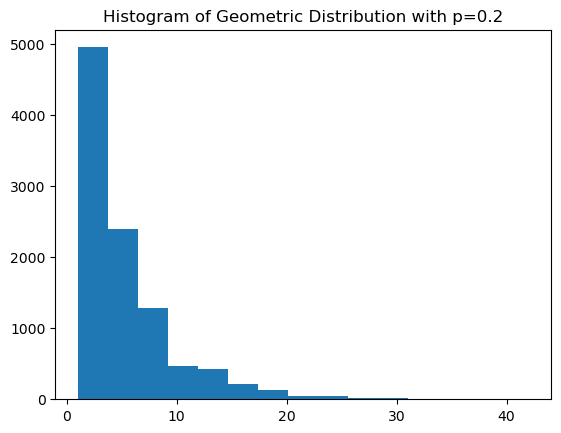

In [38]:
np.random.seed(666)
N = 10000
x = np.random.geometric(p=0.2, size=N)
plt.hist(x, bins=15)
plt.title("Histogram of Geometric Distribution with p=0.2")
plt.show()

# Sorting the observed values for the first distribution
x_sorted = np.sort(x)

# Cumulative sum of the sorted values
cumulative_sum = np.cumsum(x_sorted)

# Total sum of the values (to normalize and get proportions)
total_sum = np.sum(x_sorted)

# Cumulative expected value proportion
cumulative_proportion = cumulative_sum / total_sum

# Find the k value where cumulative expected value reaches 80%
target_proportion = 0.8
k_value = np.argmax(cumulative_proportion >= target_proportion)


80% percent of the cumulative expected value is contained in the first 0.95 fraction of the data.
80% percent of the data is contained in the [0, 8.0] interval, which covers 19.05% of the interval.


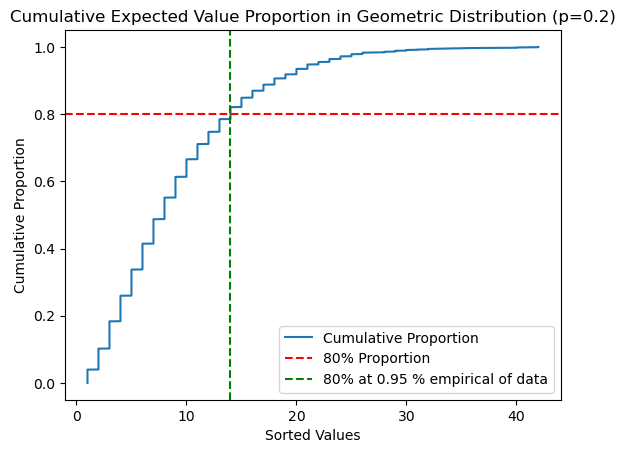

In [39]:
# Compute fraction for k_value
fraction_of_k = k_value / N

# Update the final print statement to reflect the fraction instead of the confusing k value
q08 = np.quantile(x, 0.8)
max_ = np.max(x)

# Displaying the 80/20 rule comparison
coverage_percentage = np.round(100 * q08 / max_, 2)

# Merging everything and printing the final result about the 80/20 rule
print(f'80% percent of the cumulative expected value is contained in the first {fraction_of_k:.2f} fraction of the data.')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {coverage_percentage}% of the interval.')

# Plot cumulative proportion against sorted values and mark the 80% point
plt.plot(x_sorted, cumulative_proportion, label="Cumulative Proportion")
plt.axhline(y=0.8, color='red', linestyle='--', label="80% Proportion")
plt.axvline(x=x_sorted[k_value], color='green', linestyle='--', label=f'80% at {fraction_of_k:.2f} % empirical of data')
plt.title("Cumulative Expected Value Proportion in Geometric Distribution (p=0.2)")
plt.xlabel("Sorted Values")
plt.ylabel("Cumulative Proportion")
plt.legend()
plt.show()



# 3
Draw a histogram with marked sigm intervals for variables drawn from a continuous power distribution

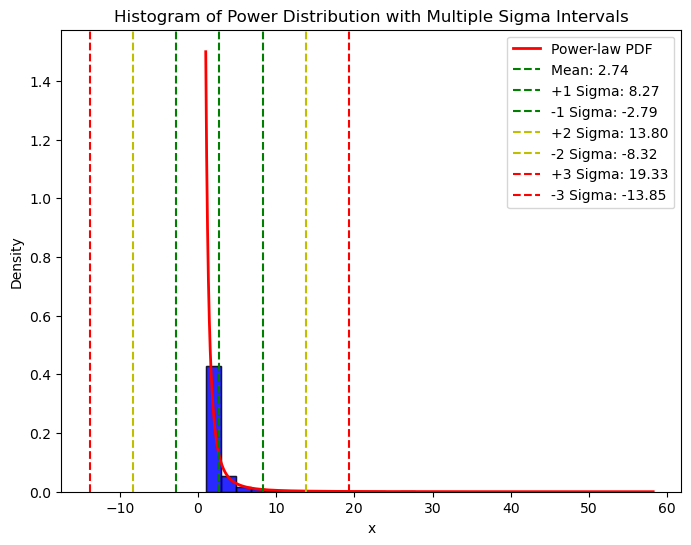

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define the power distribution PDF
def power_distribution_pdf(x, alpha, xmin):
    return (alpha - 1) / xmin * (x / xmin)**(-alpha)

# Inverse CDF for sampling (derived from the PDF)
def inverse_transform_sampling(alpha, xmin, size):
    u = np.random.uniform(0, 1, size)
    return xmin * (1 - u)**(-1 / (alpha - 1))

# Parameters for the power distribution
alpha = 2.5  # Example value for the exponent
xmin = 1.0  # Minimum x value

# Generate samples
num_samples = 1000
samples = inverse_transform_sampling(alpha, xmin, num_samples)

# Create histogram
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Plot the theoretical PDF for comparison
x_vals = np.linspace(xmin, np.max(samples), 1000)
pdf_vals = power_distribution_pdf(x_vals, alpha, xmin)

# Update the plot to mark 2 and 3 sigma intervals with specified colors
colors = ['g', 'y', 'r']  # Colors for sigma intervals

plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Plot the theoretical PDF for comparison
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label='Power-law PDF')

# Mark sigma intervals
plt.axvline(mean, color=colors[0], linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(mean + std_dev, color=colors[0], linestyle='--', label=f'+1 Sigma: {mean + std_dev:.2f}')
plt.axvline(mean - std_dev, color=colors[0], linestyle='--', label=f'-1 Sigma: {mean - std_dev:.2f}')

# 2 sigma intervals
plt.axvline(mean + 2*std_dev, color=colors[1], linestyle='--', label=f'+2 Sigma: {mean + 2*std_dev:.2f}')
plt.axvline(mean - 2*std_dev, color=colors[1], linestyle='--', label=f'-2 Sigma: {mean - 2*std_dev:.2f}')

# 3 sigma intervals
plt.axvline(mean + 3*std_dev, color=colors[2], linestyle='--', label=f'+3 Sigma: {mean + 3*std_dev:.2f}')
plt.axvline(mean - 3*std_dev, color=colors[2], linestyle='--', label=f'-3 Sigma: {mean - 3*std_dev:.2f}')

# Add labels and title
plt.title('Histogram of Power Distribution with Multiple Sigma Intervals')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


## 4

Histogram for observations drawn from zeta distrubtion

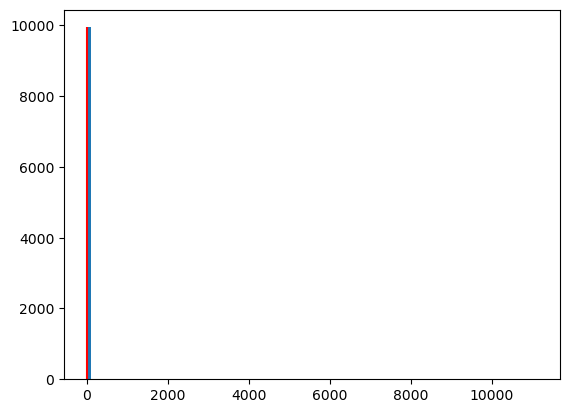

In [58]:
obs = np.random.zipf(a=2, size=N)
max_ = np.max(obs)
q08 = np.quantile(obs, 0.8)
bins = plt.hist(obs, bins=N//100)
plt.vlines([q08], 0, max(bins[0]), color='red')

In [59]:
print(f'All observations are contained in the [0, {max_}] interval')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {np.round(100 * q08/max_, 5)}% of the interval') 

All observations are contained in the [0, 11128] interval
80% percent of the data is contained in the [0, 3.0] interval, which covers 0.02696% of the interval


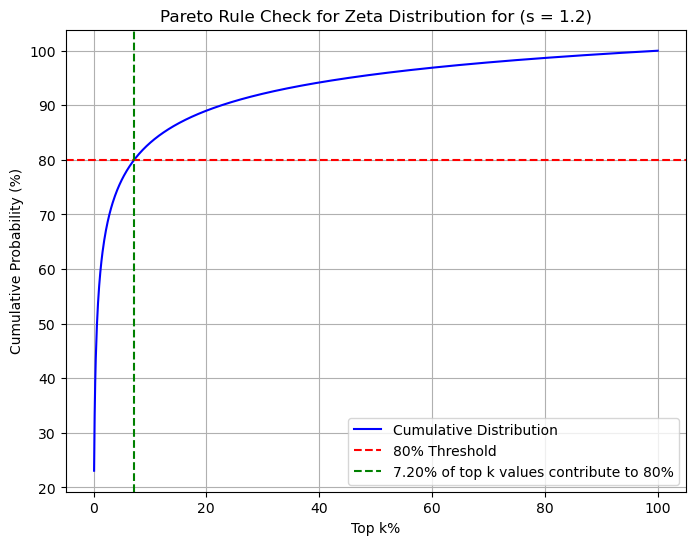

In [68]:
# Reimport the necessary libraries and re-execute the calculation for the Pareto rule

import numpy as np
from scipy.special import zeta
import matplotlib.pyplot as plt

# Define the zeta distribution PMF
def zeta_distribution_pmf(k, s):
    return (1 / zeta(s)) * k**(-s)

# Parameters for the zeta distribution
s = 1.2  # Shape parameter
k_values = np.arange(1, 1001)  # Generate k values from 1 to 1000

# Calculate probabilities for the zeta distribution
probabilities = zeta_distribution_pmf(k_values, s)

# Sort probabilities in descending order to check the Pareto rule
sorted_probabilities = np.sort(probabilities)[::-1]

# Calculate cumulative sums of sorted probabilities
cumulative_sum = np.cumsum(sorted_probabilities)

# Normalize the cumulative sums to a percentage of total probability
cumulative_sum_percent = cumulative_sum / cumulative_sum[-1] * 100

# Check the percentage of k-values that contribute to 80% of the cumulative probability
percent_contributing_to_80 = np.argmax(cumulative_sum_percent >= 80) + 1  # Find index where it crosses 80%

# Convert to percentage of k-values
percentage_k_values = percent_contributing_to_80 / len(k_values) * 100

# Plot the Pareto curve and mark the 80% contribution line
percent_top_20 = np.arange(1, len(cumulative_sum_percent) + 1) / len(cumulative_sum_percent) * 100

plt.figure(figsize=(8, 6))
plt.plot(percent_top_20, cumulative_sum_percent, label='Cumulative Distribution', color='b')

# Mark the actual percentage that contributes to 80%
plt.axhline(80, color='r', linestyle='--', label='80% Threshold')
plt.axvline(percentage_k_values, color='g', linestyle='--', label=f'{percentage_k_values:.2f}% of top k values contribute to 80%')

# Add labels and title
plt.title(f'Pareto Rule Check for Zeta Distribution for (s = {s})')
plt.xlabel('Top k%')
plt.ylabel('Cumulative Probability (%)')
plt.legend()
plt.grid(True)
plt.show()


## 5

 generate BA network and ER graphs using built-in functions.
 - observe the presence of hubs.
 - draw a vertex degree histogram.
 - compute estimators of expectation and variance for vertex
 degrees.
 - how are the two cases different?

In [69]:
import networkx as nx

Barabasi - albert network is generated as follows: Everytime we pick a new node, we connect it with $m$ existing nodes. Repeat $n$ times 

Erdos renyi graph is generated as follows: Pick $N$ nodes, and for each pair of nodes, the probability that they should be connected is equal to $p$.

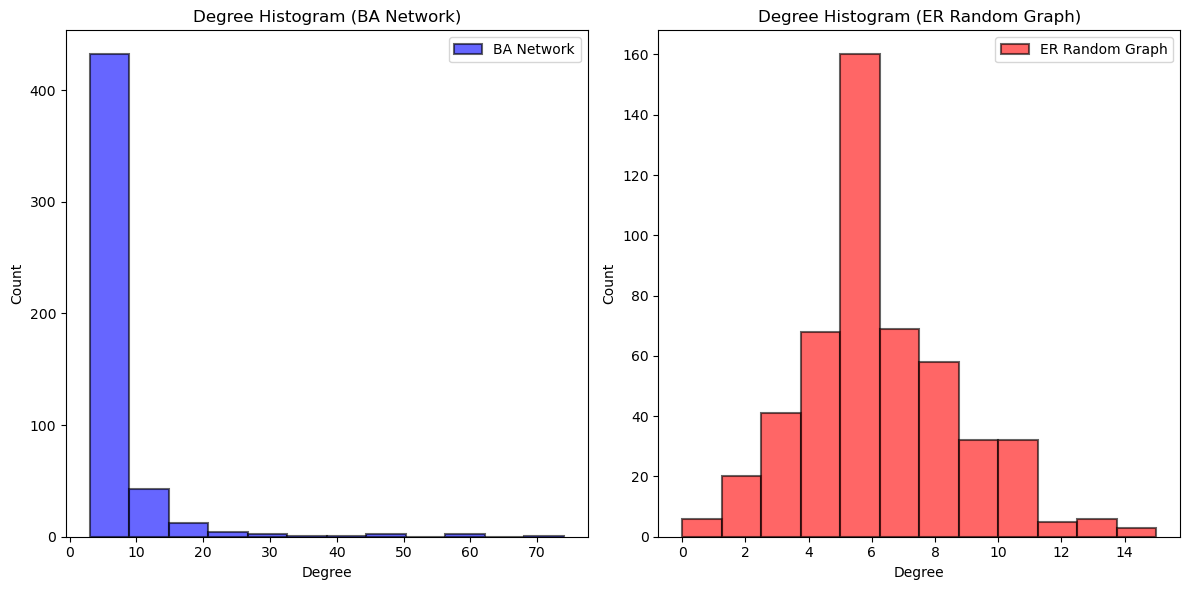

Average degree in BA network: 5.96 , and it is variance is 46.18
Average degree in ER random graph: 6.11, and it is variance is 6.20
Number of hubs in BA network: 56
Number of hubs in ER random graph: 78


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Barabasi-Albert (BA) network
n = 500
m = 3  
ba_graph = nx.barabasi_albert_graph(n, m)

# Erdos-Renyi (ER) random graph
p = 0.012
er_graph = nx.erdos_renyi_graph(n, p)

# Calculate degree distributions
ba_degrees = [degree for node, degree in ba_graph.degree()]
er_degrees = [degree for node, degree in er_graph.degree()]

# Plot degree histograms with black borders along the bars
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.hist(ba_degrees, bins=12, color='b', alpha=0.6, label='BA Network', edgecolor='black', linewidth=1.5)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Histogram (BA Network)')
plt.legend()

plt.subplot(122)
plt.hist(er_degrees, bins=12, color='r', alpha=0.6, label='ER Random Graph', edgecolor='black', linewidth=1.5)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Histogram (ER Random Graph)')
plt.legend()

plt.tight_layout()
plt.show()

# Calculating hubs
ba_hubs = [node for node, degree in ba_graph.degree() if degree >= np.percentile(ba_degrees, 90)]
er_hubs = [node for node, degree in er_graph.degree() if degree >= np.percentile(er_degrees, 90)]

# Displaying results
ba_avg_degree = np.mean(ba_degrees)
er_avg_degree = np.mean(er_degrees)
ba_var_degree = np.var(ba_degrees)
er_var_degree = np.var(er_degrees)

ba_hub_count = len(ba_hubs)
er_hub_count = len(er_hubs)

print(f'Average degree in BA network: {ba_avg_degree:.2f} , and it is variance is {ba_var_degree:.2f}')
print(f'Average degree in ER random graph: {er_avg_degree:.2f}, and it is variance is {er_var_degree:.2f}')
print(f'Number of hubs in BA network: {ba_hub_count}')
print(f'Number of hubs in ER random graph: {er_hub_count}')

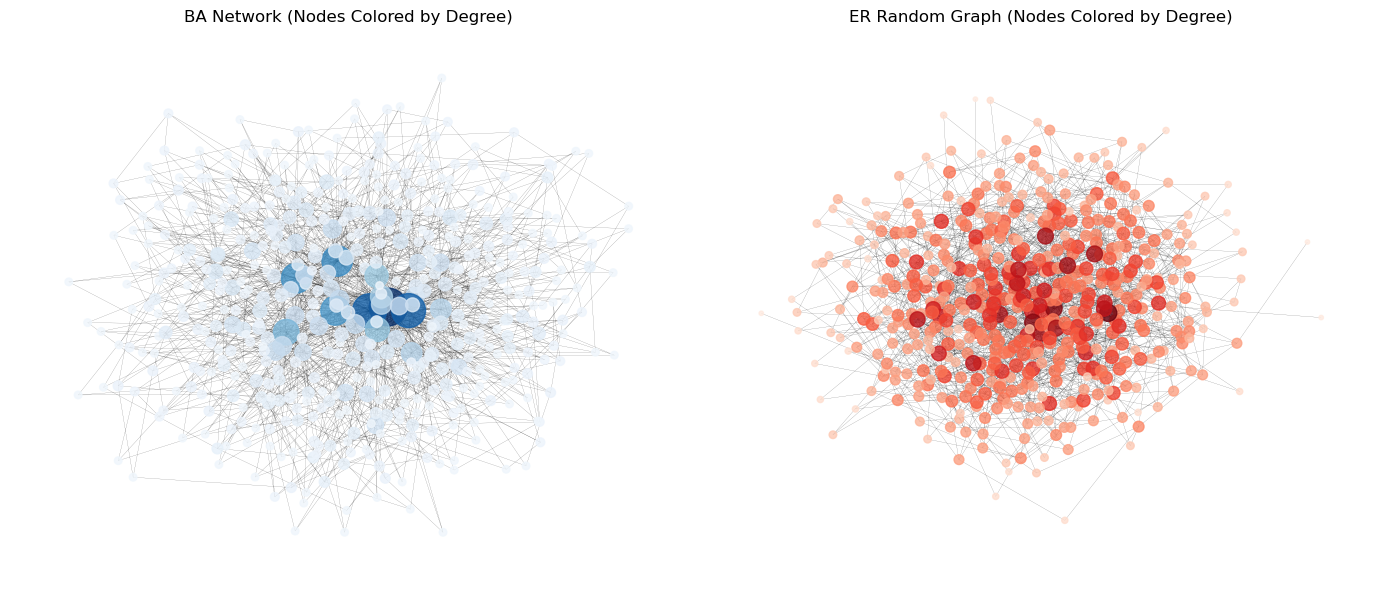

In [10]:
# Plot the BA and ER graphs side by side, keeping the original color schemes

plt.figure(figsize=(14, 6))

# BA network visualization with original blue hues
plt.subplot(121)
pos_ba = nx.spring_layout(ba_graph)
cmap_ba = plt.cm.Blues(np.array(ba_degrees) / np.max(ba_degrees))
nx.draw(ba_graph, pos_ba, node_size=10 * np.array(ba_degrees), node_color=cmap_ba, alpha=0.8, with_labels=False, width=0.1)
plt.title("BA Network (Nodes Colored by Degree)")

# ER network visualization with original red hues
plt.subplot(122)
pos_er = nx.spring_layout(er_graph, k=0.2)
cmap_er = plt.cm.Reds(np.array(er_degrees) / np.max(er_degrees))
nx.draw(er_graph, pos_er, node_size=10 * np.array(er_degrees), node_color=cmap_er, alpha=0.8, with_labels=False, width=0.1)
plt.title("ER Random Graph (Nodes Colored by Degree)")

plt.tight_layout()
plt.show()


# P3.1
Football data from previous project

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def read_net_file(filepath):
    """
    Reads a .net file and constructs a directed graph using NetworkX.
    The file must contain *Vertices and *Arcs sections for nodes and edges.
    """
    G = nx.DiGraph()  # Initialize a directed graph
    vertices_section = False  # Tracks if we are in the vertices section
    arcs_section = False  # Tracks if we are in the arcs section
    
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()

            # Detect sections in the .net file
            if "*Vertices" in line:
                vertices_section = True
                arcs_section = False
                continue
            elif "*Arcs" in line:
                vertices_section = False
                arcs_section = True
                continue

            # Process vertices (nodes)
            if vertices_section:
                parts = line.split()
                if len(parts) >= 4:
                    node_id = int(parts[0])
                    label = parts[1].strip('"')  # Remove quotes around the label
                    x, y = float(parts[2]), float(parts[3])  # Coordinates
                    G.add_node(node_id, label=label, x=x, y=y)  # Add node with attributes

            # Process arcs (edges)
            if arcs_section:
                parts = line.split()
                if len(parts) == 3:
                    source = int(parts[0])  # Start of the edge
                    target = int(parts[1])  # End of the edge
                    weight = int(parts[2])  # Weight of the edge
                    G.add_edge(source, target, weight=weight)  # Add edge with weight
    
    return G

def draw_graph(G, layout='kamada_kawai'):
    """
    Draws the directed graph with positions based on node attributes or using a chosen layout,
    node size based on degree, and edge labels to display weights.
    
    Parameters:
    - G: NetworkX graph object
    - layout: String to specify the layout type (options: 'kamada_kawai', 'circular', 'spring', 'spectral')
    """
    # Choose the layout based on the input
    if layout == 'kamada_kawai':
        positions = nx.kamada_kawai_layout(G)
    elif layout == 'circular':
        positions = nx.circular_layout(G)
    elif layout == 'spring':
        positions = nx.spring_layout(G)
    elif layout == 'spectral':
        positions = nx.spectral_layout(G)
    else:
        # Default to kamada_kawai layout if an invalid option is provided
        positions = nx.kamada_kawai_layout(G)
    
    # Calculate node degrees to adjust node sizes
    degrees = np.array([deg for node, deg in G.degree()])

    # Normalize node sizes between a minimum and maximum size
    min_size = 300
    max_size = 4000
    node_sizes = min_size + (degrees - degrees.min()) / (degrees.max() - degrees.min()) * (max_size - min_size)
    
    # Create a colormap for node degrees
    node_color_map = degrees

    plt.figure(figsize=(12, 10))  # Set the figure size

    # Draw the graph
    nx.draw(G, pos=positions, 
            with_labels=True, 
            labels=nx.get_node_attributes(G, 'label'), 
            node_size=node_sizes, 
            node_color=node_color_map, cmap=plt.cm.coolwarm,  # Use color map based on degree
            font_size=10, font_color='black', 
            edge_color='gray', arrows=True, 
            arrowstyle='-|>', arrowsize=20,  # Arrow style and size for edges
            linewidths=1.5)

    # Add edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, font_size=9)

    plt.title(f'Football Network Graph ({layout} layout)', fontsize=16, fontweight='bold')  # Add a title
    plt.show()

# Example usage:
filepath = 'football.net'  # Replace with your actual .net file path
G = read_net_file(filepath)



Uses eigenvectors and spectral matrix decomopsition

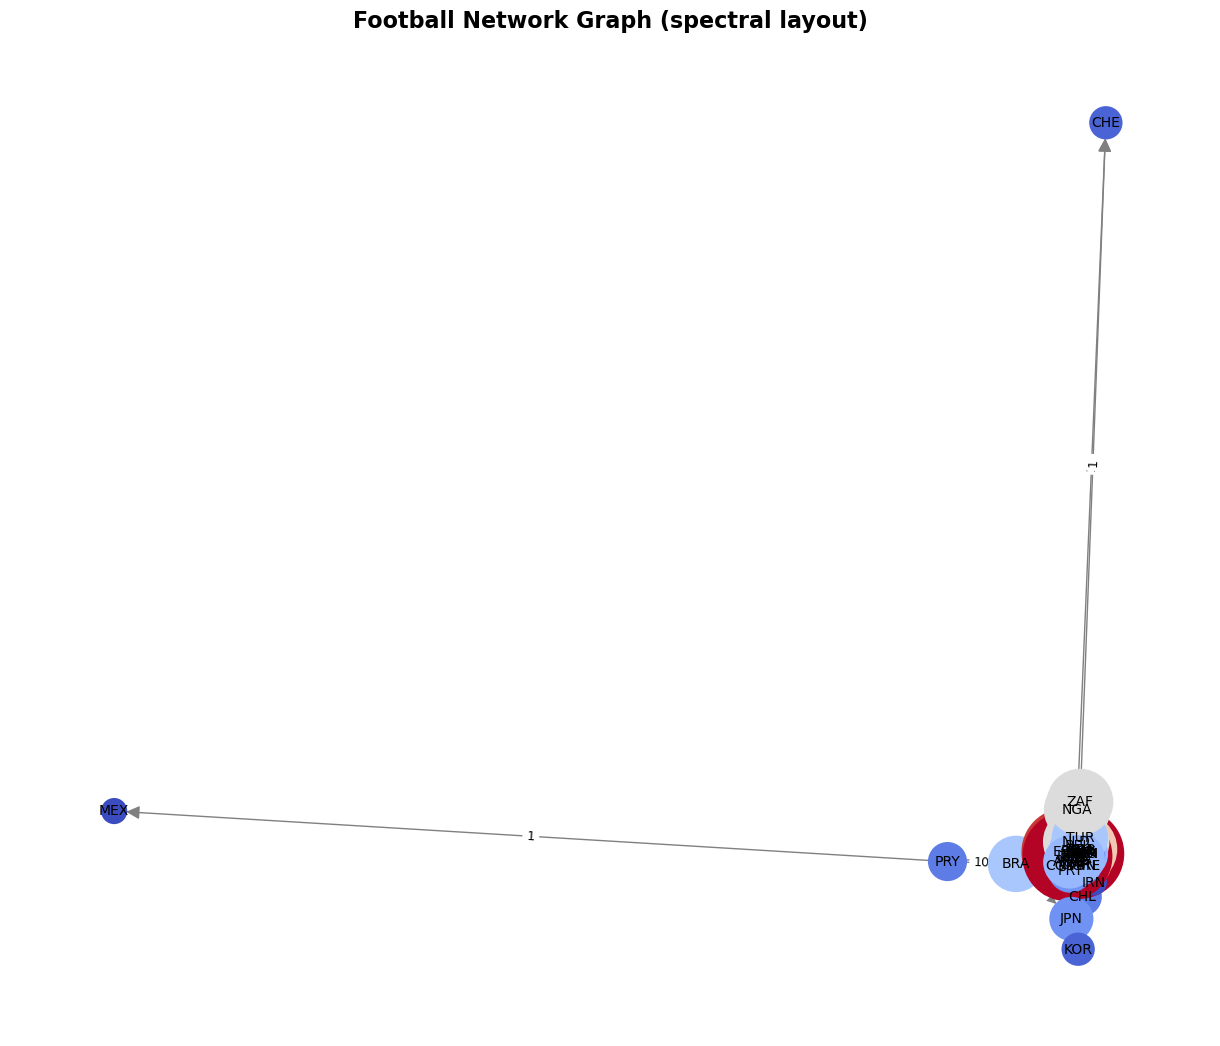

In [3]:
draw_graph(G, layout='spectral')

Places nodes in a circle

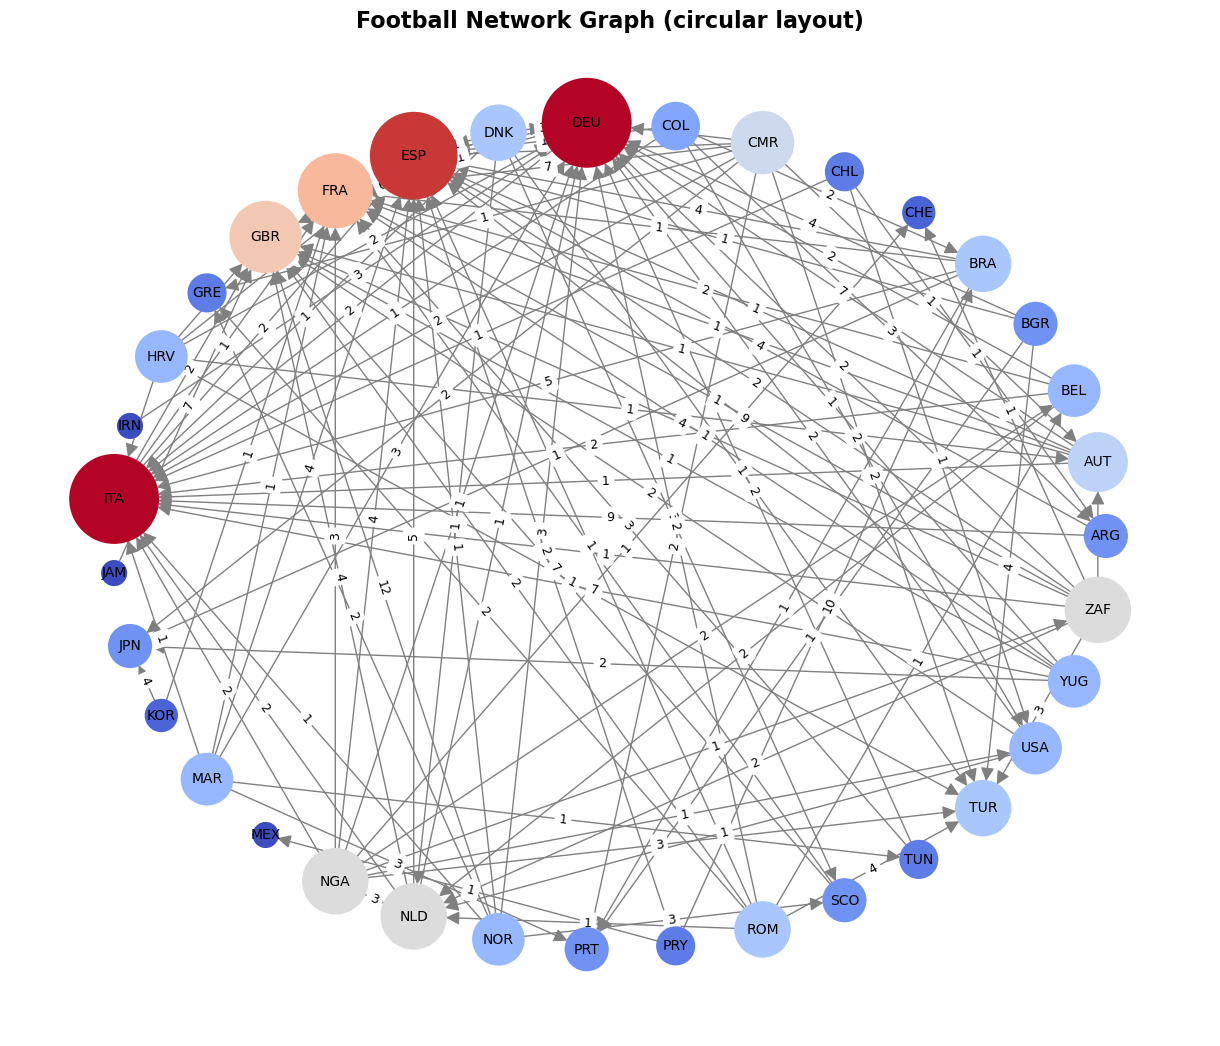

In [4]:
draw_graph(G, layout='circular')

#  The Kamada-Kawai graph layout attempts to position nodes on the space so that the geometric (Euclidean) distance between them is as close as possible to the graph-theoretic (path) distance between them.

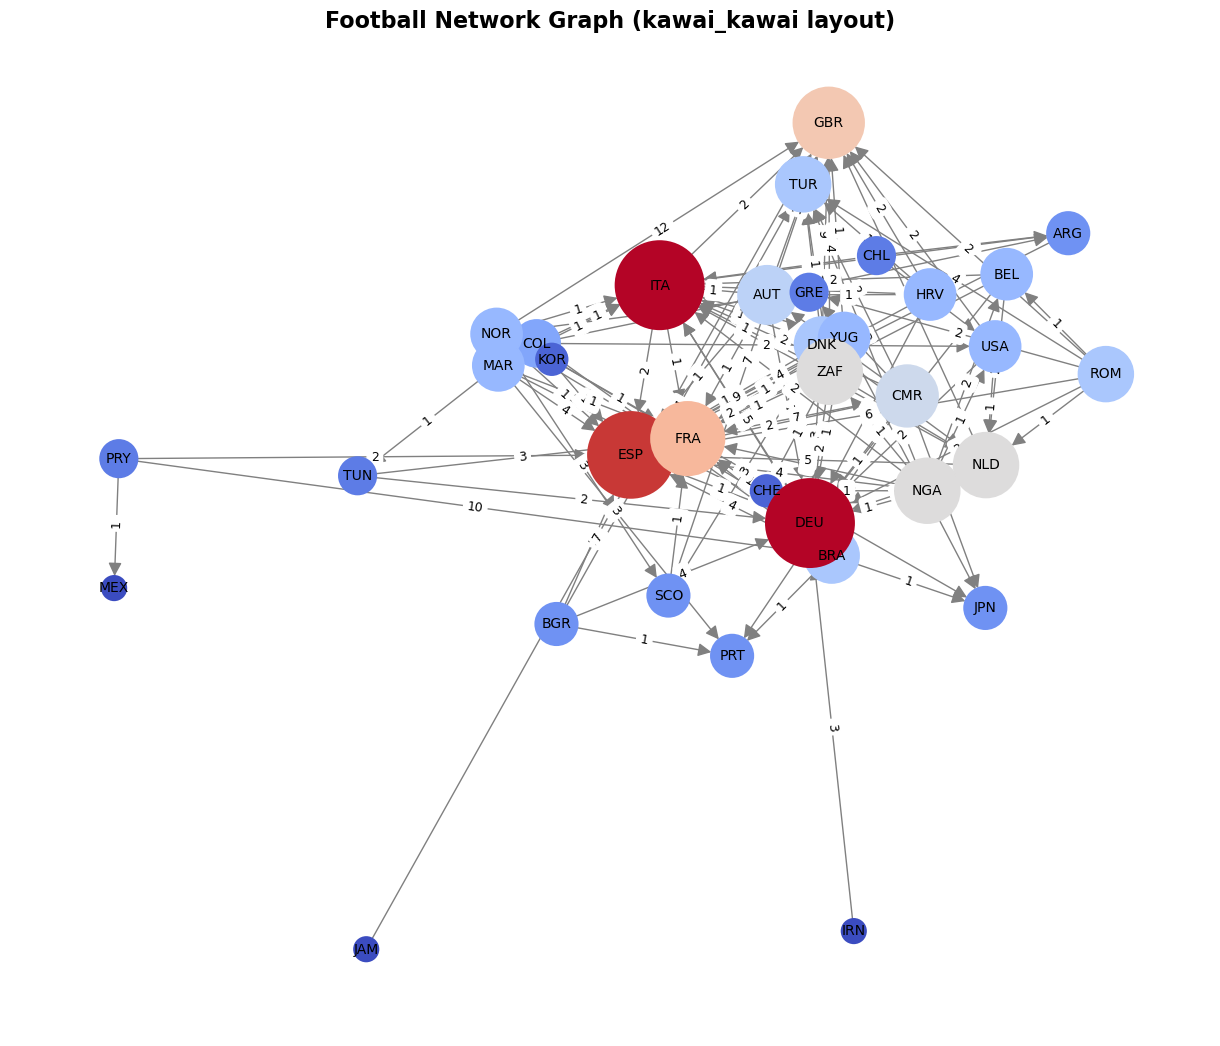

In [5]:
draw_graph(G, layout='kawai_kawai')

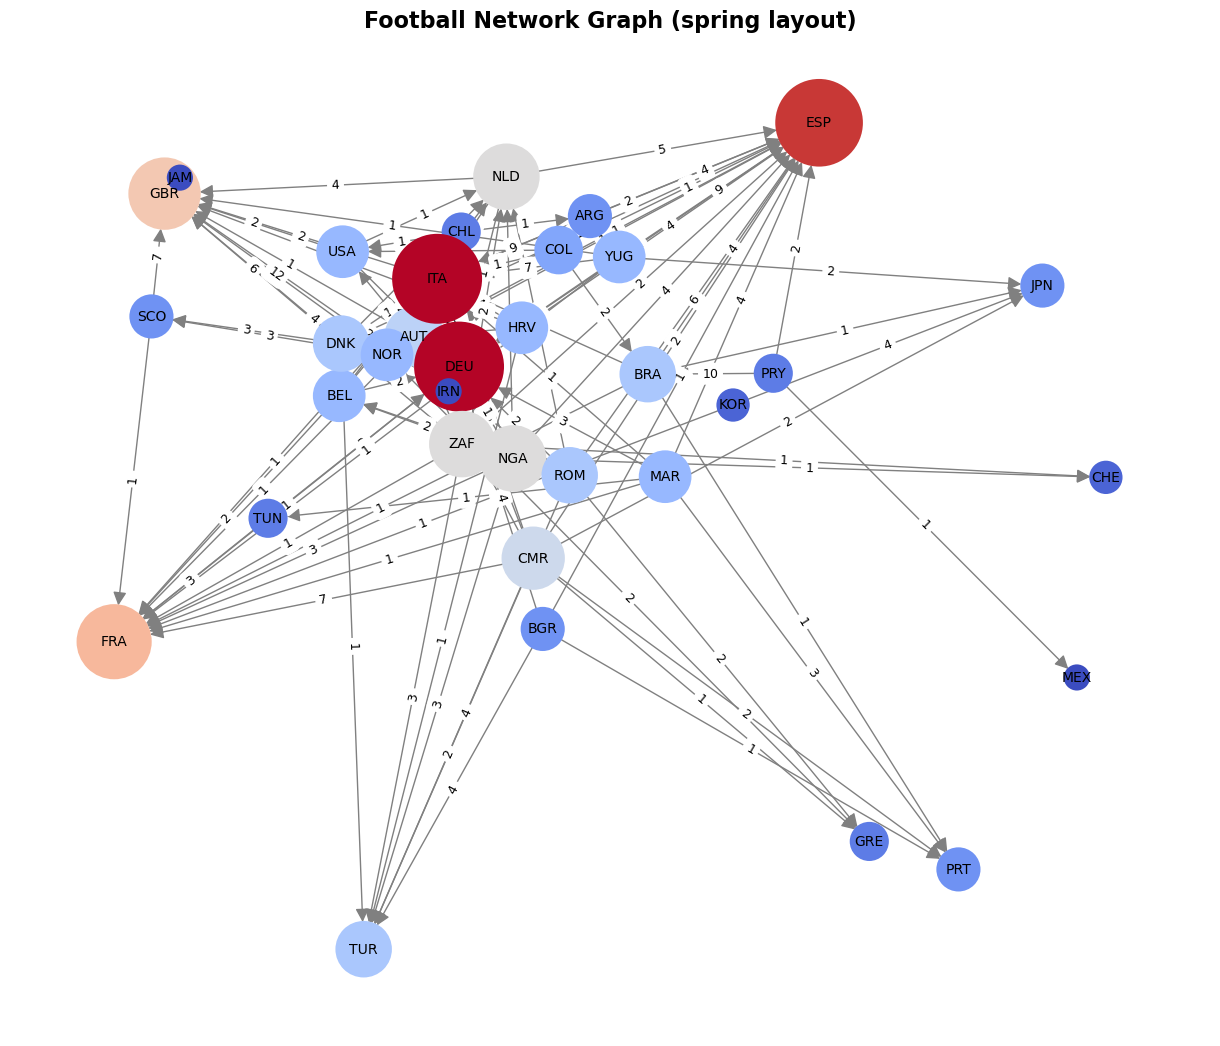

In [6]:
draw_graph(G, layout='spring')

## 6.3

ITERATION NUMBER 0
Success with lowering the total energy! New energy: 26890.495972532928
Success with lowering the total energy! New energy: 26235.610674032414
Success with lowering the total energy! New energy: 25543.131527559854
Success with lowering the total energy! New energy: 25209.634486310155
Success with lowering the total energy! New energy: 24837.677156167745
Success with lowering the total energy! New energy: 24506.335157182242
Success with lowering the total energy! New energy: 24284.15444354947
Success with lowering the total energy! New energy: 24001.777113329827
Success with lowering the total energy! New energy: 23615.297946152463
Success with lowering the total energy! New energy: 23223.01608138959
Success with lowering the total energy! New energy: 23029.086087436663
Success with lowering the total energy! New energy: 22572.47254918114
Success with lowering the total energy! New energy: 22229.66133547019
Success with lowering the total energy! New energy: 21777.2104

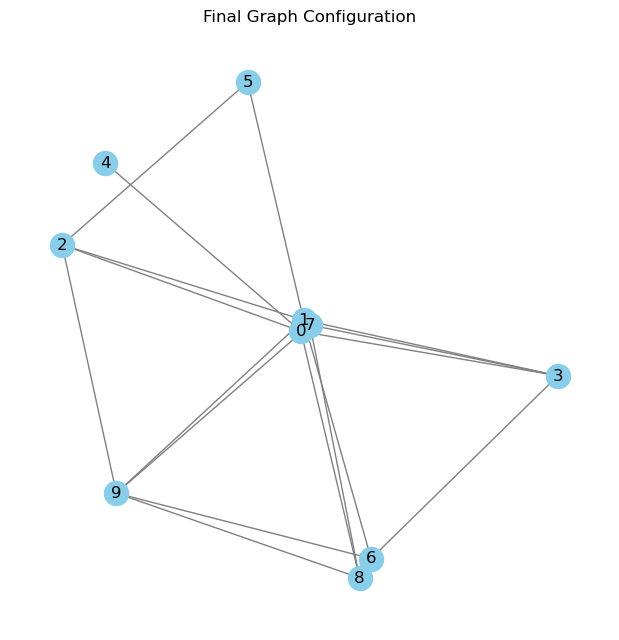

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

# Set random seed for reproducibility
np.random.seed(5734234)

# Constants
C = 10           # Spring constant
D = 0.01         # Electric constant
SPRING_NEUTRAL_POINT = 4  # Neutral length of springs
N_OF_ITERATIONS = 1500
N_OF_MOVES_PER_IT = 10

# Create a random graph with 10 nodes
G = nx.erdos_renyi_graph(10, 0.3, seed=42)

# Generate initial random positions for the nodes
l1 = np.random.normal(loc=6, scale=10, size=10)
l2 = np.random.normal(loc=6, scale=10, size=10)
coords = np.column_stack((l1, l2))

# Assign initial positions to nodes
pos = {i: coords[i] for i in range(len(coords))}
nx.set_node_attributes(G, pos, 'coords')

# Initialize variables to store energies and coordinates
energies_saved = []
coords_saved = []

# Get initial coordinates
coords_array = np.array([pos[i] for i in range(len(pos))])

# Initialize minimal energy
old_minimal_energy = None

# Main loop for simulated annealing
for j in range(N_OF_ITERATIONS):
    if j % 200 == 0:
        print(f"ITERATION NUMBER {j}")

    # Generate moves
    moves = [np.random.normal(loc=0, scale=0.1, size=(10, 2)) for _ in range(N_OF_MOVES_PER_IT)]
    total_energies = []

    for move in moves:
        # Apply move to coordinates
        new_coords = coords_array + move

        # Compute total energy
        total_energy = 0.0

        # Spring energies
        for edge in G.edges():
            i, k = edge
            xi, yi = new_coords[i]
            xk, yk = new_coords[k]
            dist = np.hypot(xi - xk, yi - yk)
            spring_energy = C * (dist - SPRING_NEUTRAL_POINT) ** 2
            total_energy += spring_energy

        # Electrostatic energies
        for i in G.nodes():
            xi, yi = new_coords[i]
            for k in G.nodes():
                if i >= k:
                    continue  # Avoid double counting
                xk, yk = new_coords[k]
                dist = np.hypot(xi - xk, yi - yk)
                if dist == 0:
                    continue  # Avoid division by zero
                el_energy = D / dist
                total_energy += el_energy

        total_energies.append(total_energy)

    # Find the move with minimal total energy
    min_energy = min(total_energies)
    index_of_minimal_energy_move = np.argmin(total_energies)

    # Accept the move if it lowers the energy
    if old_minimal_energy is None or min_energy <= old_minimal_energy:
        print(f"Success with lowering the total energy! New energy: {min_energy}")

        # Update coordinates and minimal energy
        coords_array = coords_array + moves[index_of_minimal_energy_move]
        old_minimal_energy = min_energy

        # Save energies and coordinates
        energies_saved.append(min_energy)
        coords_saved.append(coords_array.copy())

        # Update node positions in the graph
        pos = {i: coords_array[i] for i in range(len(coords_array))}
        nx.set_node_attributes(G, pos, 'coords')

# Prepare animation
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

# Calculate global axis limits based on all saved coordinates
all_coords = np.concatenate(coords_saved)
x_min, x_max = all_coords[:, 0].min() - 1, all_coords[:, 0].max() + 1
y_min, y_max = all_coords[:, 1].min() - 1, all_coords[:, 1].max() + 1

def animate(i):
    ax.clear()
    # Plot the graph with the coordinates at frame i
    nx.draw(G, coords_saved[i], ax=ax, node_color='skyblue', edge_color='gray', with_labels=True)
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_title(f"Iteration {i+1}/{len(coords_saved)}, Energy: {energies_saved[i]:.2f}")

anim = FuncAnimation(fig, animate, frames=len(coords_saved), interval=100, repeat=False)
plt.close()

# Save the animation as an animated GIF with increased fps to speed it up
anim.save("s.gif", dpi=80, writer=PillowWriter(fps=15))

# Display the final graph configuration
plt.figure(figsize=(6, 6))
nx.draw(G, coords_saved[-1], node_color='skyblue', edge_color='gray', with_labels=True)
plt.title("Final Graph Configuration")
plt.show()


ITERATION NUMBER 0
Success with lowering the total energy! New energy: 66545.25950692981
Success with lowering the total energy! New energy: 65583.76669675339
Success with lowering the total energy! New energy: 64362.227232227175
Success with lowering the total energy! New energy: 63996.62839781665
Success with lowering the total energy! New energy: 63422.18704440998
Success with lowering the total energy! New energy: 62943.43658352219
Success with lowering the total energy! New energy: 62218.95365588866
Success with lowering the total energy! New energy: 61764.45645120193
Success with lowering the total energy! New energy: 60802.94924927034
Success with lowering the total energy! New energy: 60261.837768180594
Success with lowering the total energy! New energy: 59762.23893147082
Success with lowering the total energy! New energy: 59001.79410378293
Success with lowering the total energy! New energy: 58067.00994939213
Success with lowering the total energy! New energy: 57695.58978427711

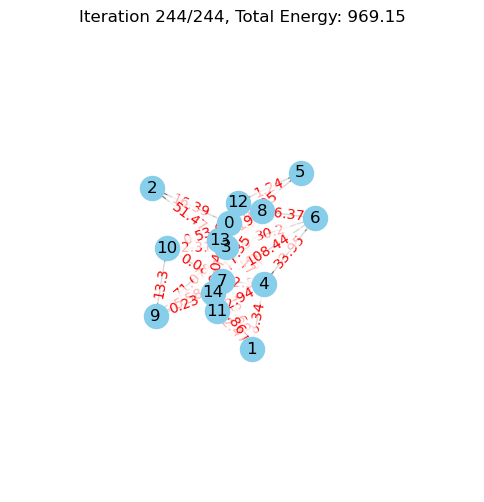

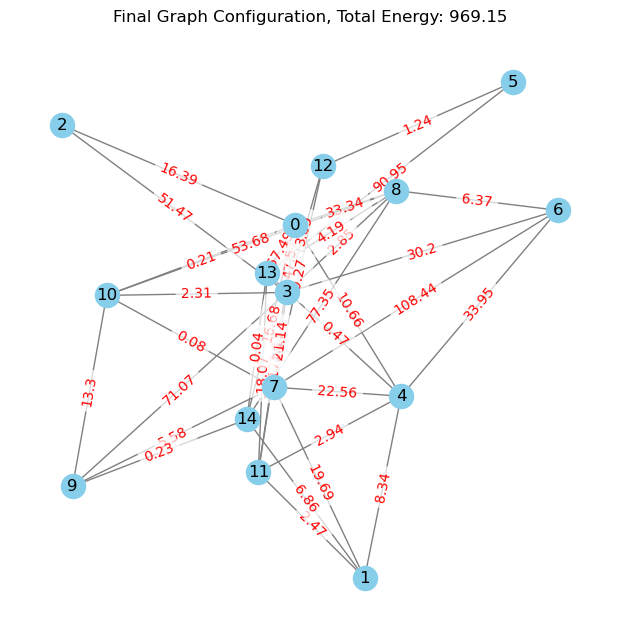

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

# Set random seed for reproducibility
np.random.seed(5734234)

# Constants
C = 10           # Spring constant
D = 0.01         # Electric constant
SPRING_NEUTRAL_POINT = 4  # Neutral length of springs
N_OF_ITERATIONS = 1500
N_OF_MOVES_PER_IT = 10

# Increased number of nodes
NUM_NODES = 15  # You can adjust this number to add more vertices

# Create a random graph with NUM_NODES nodes
G = nx.erdos_renyi_graph(NUM_NODES, 0.3, seed=42)

# Generate initial random positions for the nodes
l1 = np.random.normal(loc=6, scale=10, size=NUM_NODES)
l2 = np.random.normal(loc=6, scale=10, size=NUM_NODES)
coords = np.column_stack((l1, l2))

# Assign initial positions to nodes
pos = {i: coords[i] for i in range(len(coords))}
nx.set_node_attributes(G, pos, 'coords')

# Initialize variables to store energies and coordinates
energies_saved = []
coords_saved = []
edge_energies_saved = []

# Get initial coordinates
coords_array = np.array([pos[i] for i in range(len(pos))])

# Initialize minimal energy
old_minimal_energy = None

# Main loop for simulated annealing
for j in range(N_OF_ITERATIONS):
    if j % 200 == 0:
        print(f"ITERATION NUMBER {j}")

    improved = False  # Flag to check if any move improved the energy

    # Generate moves
    moves = [np.random.normal(loc=0, scale=0.1, size=(NUM_NODES, 2)) for _ in range(N_OF_MOVES_PER_IT)]
    total_energies = []
    energies_per_move = []  # To store energies per move for edge labels

    for move in moves:
        # Apply move to coordinates
        new_coords = coords_array + move

        # Compute total energy
        total_energy = 0.0

        # Energy per edge for labeling
        edge_energies = {}

        # Spring energies
        for edge in G.edges():
            i, k = edge
            xi, yi = new_coords[i]
            xk, yk = new_coords[k]
            dist = np.hypot(xi - xk, yi - yk)
            spring_energy = C * (dist - SPRING_NEUTRAL_POINT) ** 2
            total_energy += spring_energy

            # Store edge energy for labeling
            edge_key = (i, k) if (i, k) in G.edges() else (k, i)
            edge_energies[edge_key] = round(spring_energy, 2)

        # Electrostatic energies
        for i in G.nodes():
            xi, yi = new_coords[i]
            for k in G.nodes():
                if i >= k:
                    continue  # Avoid double counting
                xk, yk = new_coords[k]
                dist = np.hypot(xi - xk, yi - yk)
                if dist == 0:
                    continue  # Avoid division by zero
                el_energy = D / dist
                total_energy += el_energy

        total_energies.append(total_energy)
        energies_per_move.append((total_energy, edge_energies))

    # Find the move with minimal total energy
    min_energy = min(total_energies)
    index_of_minimal_energy_move = np.argmin(total_energies)

    # Accept the move if it lowers the energy
    if old_minimal_energy is None or min_energy < old_minimal_energy:
        print(f"Success with lowering the total energy! New energy: {min_energy}")

        # Update coordinates and minimal energy
        coords_array = coords_array + moves[index_of_minimal_energy_move]
        old_minimal_energy = min_energy

        # Save energies and coordinates
        energies_saved.append(min_energy)
        coords_saved.append(coords_array.copy())

        # Save edge energies for labeling
        edge_energies_saved.append(energies_per_move[index_of_minimal_energy_move][1])

        # Update node positions in the graph
        pos = {i: coords_array[i] for i in range(len(coords_array))}
        nx.set_node_attributes(G, pos, 'coords')

        improved = True  # We have an improvement
    else:
        print("No improvement in this iteration.")
        coords_saved.append(coords_array.copy())
        energies_saved.append(old_minimal_energy)
        edge_energies_saved.append(edge_energies_saved[-1])

    if not improved:
        print("No improvements found. Stopping iterations.")
        break

# Animation setup
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

# Calculate axis limits based on all saved coordinates
all_coords = np.concatenate(coords_saved)
x_min, x_max = all_coords[:, 0].min() - 1, all_coords[:, 0].max() + 1
y_min, y_max = all_coords[:, 1].min() - 1, all_coords[:, 1].max() + 1

def animate(i):
    ax.clear()
    current_coords = coords_saved[i]
    current_pos = {idx: current_coords[idx] for idx in range(len(current_coords))}
    current_edge_energies = edge_energies_saved[i]
    total_energy = energies_saved[i]

    # Draw graph with updated coordinates
    nx.draw(G, current_pos, ax=ax, node_color='skyblue', edge_color='gray', with_labels=True)

    # Draw edge labels with energies
    edge_labels = {edge: f"{energy}" for edge, energy in current_edge_energies.items()}
    nx.draw_networkx_edge_labels(G, current_pos, edge_labels=edge_labels, font_size=10, font_color='red',
                                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_title(f"Iteration {i+1}/{len(coords_saved)}, Total Energy: {round(total_energy, 2)}")

# Create and save the animation
anim = FuncAnimation(fig, animate, frames=len(coords_saved), interval=500, repeat=False)
anim.save("bigger_one_with_edge_energy.gif", dpi=80, writer=PillowWriter(fps=20))

# After animation is saved, plot the final graph separately
plt.figure(figsize=(6, 6))
current_coords = coords_saved[-1]
current_pos = {idx: current_coords[idx] for idx in range(len(current_coords))}
current_edge_energies = edge_energies_saved[-1]
total_energy = energies_saved[-1]

nx.draw(G, current_pos, node_color='skyblue', edge_color='gray', with_labels=True)
edge_labels = {edge: f"{energy}" for edge, energy in current_edge_energies.items()}
nx.draw_networkx_edge_labels(G, current_pos, edge_labels=edge_labels, font_size=10, font_color='red',
                             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
plt.title(f"Final Graph Configuration, Total Energy: {round(total_energy, 2)}")
plt.show()
